In [1]:
import scipy
import cv2, requests
import numpy as np
import numpy
import tensorflow.python.platform
import tensorflow as tf
from scipy import misc
import os
import pandas as pd
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import scipy.io as sio
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
features = pd.read_csv('../dataframe_pca.csv', index_col=0)
features = features.values

In [3]:
orderOfImageRead = pd.read_csv('image_numbers.txt', header=None)

In [4]:
orderOfImageRead[0] = orderOfImageRead[0].map(lambda x: x.lstrip('image_').rstrip('.jpg'))
orderOfImageRead[0] = pd.to_numeric(orderOfImageRead[0])

a = orderOfImageRead.values
a = a.reshape(8189)

In [5]:
import operator

In [6]:
tuple_index=[]
for i in range(0,8189):
    tuple_index.append((i,a[i]))

tuple_index = sorted(tuple_index, key=operator.itemgetter(1))

In [7]:
features4=[]
for i in range(0,780):
    features4.append(features[tuple_index[i][0]])

In [8]:
labels = sio.loadmat('imagelabels.mat')
l = labels["labels"]

imagelabels4 = []
for i in range(0,780):
    imagelabels4.append(l[0][i-1])



In [9]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vis_data = model.fit_transform(features4)

In [10]:
from matplotlib import pyplot as plt
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

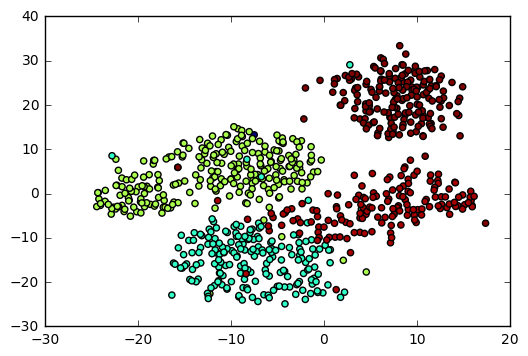

In [11]:
plt.scatter(vis_x, vis_y, c=imagelabels4)
plt.show()

In [50]:
import networkx as nx